<a href="https://colab.research.google.com/github/kaustubh-sadekar/Colab-Notebooks/blob/master/OpenCV-Notebooks/Notebook5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Understanding convolution and creating filters using OpenCV and Numpy**
We will try to create a our own filters and understand what is the effect of convolution.

In [1]:
!rm -r /content/DataFolder

rm: cannot remove '/content/DataFolder': No such file or directory


In [2]:
# Run this block to download files needed for this tutorial
!git clone https://github.com/kaustubh-sadekar/DataFolder.git

Cloning into 'DataFolder'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 28 (delta 10), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (28/28), done.


In [0]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np

#### Importing and displaying the input image

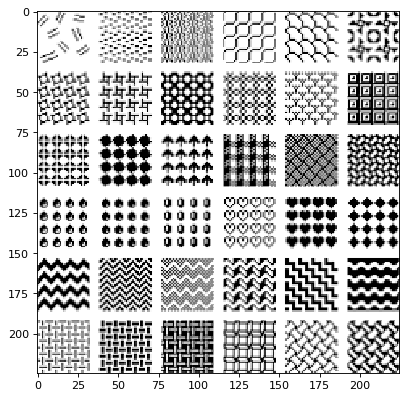

In [10]:
img_path = '/content/DataFolder/colab-images/download.png'
image = cv2.imread(img_path) # Directly reading image as a gray scale image

plt.figure(num=None,figsize=(8,6),dpi=80)
plt.imshow(image[:,:,::-1])
plt.show()

## **Creating a kernel and using cv2.filter2D() method to convolv the filter on image**

We will try to create out own kernel and convolv it to our gray scale image. By Changing the kernel we will graphically understand what is the effect of convolution on an imgae.

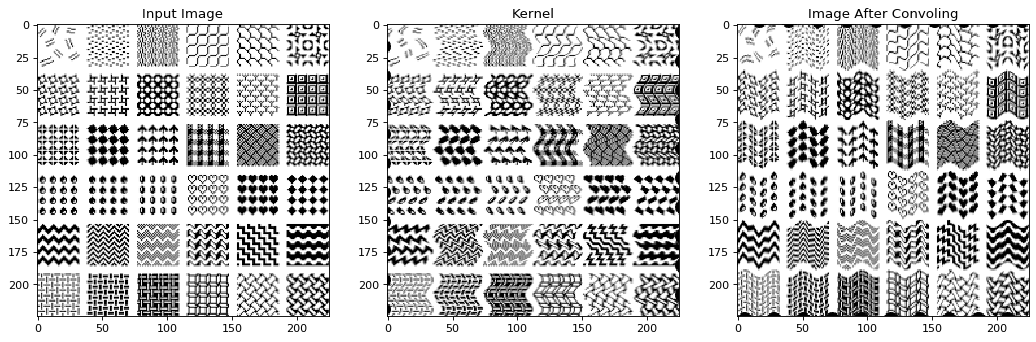

In [11]:
# Calculating the mappings

h,w = image.shape[:2]
y,x = np.meshgrid(np.arange(0,h),np.arange(0,w))
x = x.T
y = y.T

#### TYPE 1  ########
omega = 2*np.pi/(h/10.0)
x1 = x + 3*np.sin(y*omega)
funnyMirror1 = cv2.remap(image,x1.astype(np.float32),y.astype(np.float32),interpolation=cv2.INTER_LINEAR)

omega = 2*np.pi/(w/10.0)
y1 = y + 3*np.sin(x*omega)
funnyMirror2 = cv2.remap(image,x.astype(np.float32),y1.astype(np.float32),interpolation=cv2.INTER_LINEAR)



f = plt.figure(num=None, figsize=(16,12), dpi=80)
ax1 = f.add_subplot(1,3, 1)
plt.imshow(image[:,:,::-1])
ax1.title.set_text('Input Image')
ax2 = f.add_subplot(1,3, 2)
plt.imshow(funnyMirror1[:,:,::-1])
ax2.title.set_text('Kernel')
ax2 = f.add_subplot(1,3, 3)
plt.imshow(funnyMirror2[:,:,::-1])
ax2.title.set_text('Image After Convoling')
plt.show()